<a href="https://colab.research.google.com/github/veillette/jupyterNotebooks/blob/main/Classical%20Mechanics/solvingDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- - - -
# Quadratic Drag With Horizontal and Vertical Motion

## source code - https://github.com/veillette/jupyterNotebooks/blob/main/Classical%20Mechanics/solvingDE.ipynb

- - - -

Martin Veillette @ Berea College

- - - -

## Solving a first order differential equation numerically

Consider a baseball thrown with velocity 30 m/s (about 70 mi/h) at 50° above the
horizontal from a high cliff. Find its trajectory for the first eight seconds of flight and compare
with the corresponding trajectory in a vacuum. If the same baseball was thrown with the same
initial velocity on horizontal ground how far would it travel before landing? That is, what is its
horizontal range?


We would like to solve the differential equations:
$$m \frac{d v_x}{dt} = - c \left(\sqrt{ v_x^2 + v_y^2}\right) v_x ,$$
$$m \frac{d v_y}{dt} = - m g - c \left(\sqrt{ v_x^2 + v_y^2}\right) v_y$$

In [ ]:
%reset

In [1]:
# Importing necessary libraries for numerical calculations and plotting:
import numpy as np  # Imports the numpy library for numerical computations, aliased as 'np'
from numpy import cos, sin, sqrt, arange, pi  # Imports specific math functions from numpy for direct use

# Imports matplotlib for creating visualizations, aliased as 'mpl'
import matplotlib as mpl
# Imports the pyplot module from matplotlib for plotting, aliased as 'plt'
import matplotlib.pyplot as plt
# Enables inline plotting in Jupyter notebooks, displaying plots directly in the output
%matplotlib inline

# Configuring default settings for matplotlib plots:
mpl.rcParams['figure.figsize'] = (14,10)  # Sets the default figure size to 14x10 inches
mpl.rcParams['font.size'] = 14  # Sets the default font size to 14 points
mpl.rcParams['legend.fontsize'] = 14  # Sets the legend font size to 14 points

# This line is commented out and won't be executed:
#get_ipython().magic('matplotlib inline') # inline plotting (redundant, already enabled above)

## Equations of Motion with Quadratic Drag
### Acceleration
The acceleration of the baseball is influenced by both gravity and air resistance (quadratic drag). The equations for horizontal ($a_x$) and vertical ($a_y$) acceleration are:

$$ a_x = - (c/m) * \sqrt{v_x^2 + v_y^2} * v_x $$
$$ a_y = -g - (c/m) * \sqrt{v_x^2 + v_y^2} * v_y $$

### Position

Over a small time interval, the acceleration is constant, therefore we can use the familiar constant acceleration equation to update the position over a small time interval:
$$ x_{new} = x_{old} + v_{x, old} * dt + (1/2) * a_x * dt^2 $$
$$ y_{new} = y_{old} + v_{y, old} * dt + (1/2) * a_y * dt^2 $$

### Velocity

The velocity of the baseball is updated using the following equations:

$$v_{x,new} = v_{x,old} + a_x * dt$$
$$v_{y,new} = v_{y,old} + a_y * dt$$


----

This is the Euler method (specifically the explicit Euler method or forward Euler method) for numerically solving ordinary differential equations.
The algorithm you've described uses the fundamental Euler method approach of:

- Computing the current acceleration based on current position and velocity.

- Using that acceleration (assumed constant over the small time step) to update both position and velocity



In [ ]:
# parameters
dt = 0.01  # Time step for the simulation (0.01 seconds)
tmax = 3.0  # Total simulation time (3 seconds)
g = 9.8  # Acceleration due to gravity (m/s^2)
m = 0.150  # Mass of the baseball (kg)
c = 0.02;  # Drag coefficient

# numpy.arange creates an array of evenly spaced values within a given interval.
# Here, it creates an array of time values from 0 to tmax, with a step of dt.
timeRange = arange(0, tmax, dt);

# initial conditions
initialAngle = 50 * pi/180;  # Initial angle in radians (converted from 50 degrees)
speed = 30.0  # Initial speed of the baseball (m/s)
vx = speed * cos (initialAngle)  # Initial horizontal velocity (m/s)
vy = speed * sin (initialAngle)  # Initial vertical velocity (m/s)
x = 0  # Initial horizontal position (m)
y = 0  # Initial vertical position (m)

# storing arrays - These empty lists will store the calculated values over time.
vxs = []  # Horizontal velocities
vys = []  # Vertical velocities
xs = []  # Horizontal positions
ys = []  # Vertical positions

# loop over time - This loop iterates through each time step in the timeRange array.
for t in timeRange:
    # Calculate acceleration components due to drag and gravity:
    ax = - c/m * sqrt( vx**2 +vy**2)*vx  # Horizontal acceleration
    ay = - g -c/m * sqrt( vx**2 +vy**2)*vy  # Vertical acceleration

    # Update position using the equations of motion:
    x = x + vx * dt + 1/2 * ax * dt**2  # Update horizontal position
    y = y + vy * dt + 1/2 * ay * dt**2  # Update vertical position

    # Update velocity using acceleration:
    vx = vx + ax * dt  # Update horizontal velocity
    vy = vy + ay * dt  # Update vertical velocity

    # storing results - Append the calculated values to the respective lists:
    vxs.append(vx)
    vys.append(vy)

    xs.append(x)
    ys.append(y)

Below is an example that removes the explicit for loop over time: The loop now iterates over array indices rather than time values. Values are stored directly in the pre-allocated arrays using indexing.

In [3]:
# parameters
dt = 0.01  # Time step for the simulation (0.01 seconds)
tmax = 3.0  # Total simulation time (3 seconds)
g = 9.8  # Acceleration due to gravity (m/s^2)
m = 0.150  # Mass of the baseball (kg)
c = 0.02  # Drag coefficient

# Create time array
timeRange = arange(0, tmax, dt)
n_steps = len(timeRange)

# initial conditions
initialAngle = 50 * pi/180  # Initial angle in radians (converted from 50 degrees)
speed = 30.0  # Initial speed of the baseball (m/s)

# Initialize arrays to store all values
vxs = np.zeros(n_steps)  # Horizontal velocities
vys = np.zeros(n_steps)  # Vertical velocities
xs = np.zeros(n_steps)   # Horizontal positions
ys = np.zeros(n_steps)   # Vertical positions

# Set initial conditions
vxs[0] = speed * cos(initialAngle)  # Initial horizontal velocity (m/s)
vys[0] = speed * sin(initialAngle)  # Initial vertical velocity (m/s)
xs[0] = 0  # Initial horizontal position (m)
ys[0] = 0  # Initial vertical position (m)

# Vectorized computation using cumulative operations
for i in range(1, n_steps):
    # Calculate acceleration components using previous values
    v_mag = sqrt(vxs[i-1]**2 + vys[i-1]**2)
    ax = -c/m * v_mag * vxs[i-1]  # Horizontal acceleration
    ay = -g - c/m * v_mag * vys[i-1]  # Vertical acceleration

    # Update position and velocity
    xs[i] = xs[i-1] + vxs[i-1] * dt + 0.5 * ax * dt**2
    ys[i] = ys[i-1] + vys[i-1] * dt + 0.5 * ay * dt**2
    vxs[i] = vxs[i-1] + ax * dt
    vys[i] = vys[i-1] + ay * dt

Lets represent the trajectory within a single plot with two lines: one representing the baseball's horizontal displacement over time and the other representing its vertical displacement over time. We will label the plot to clearly indicate the units of measurement for both axes.

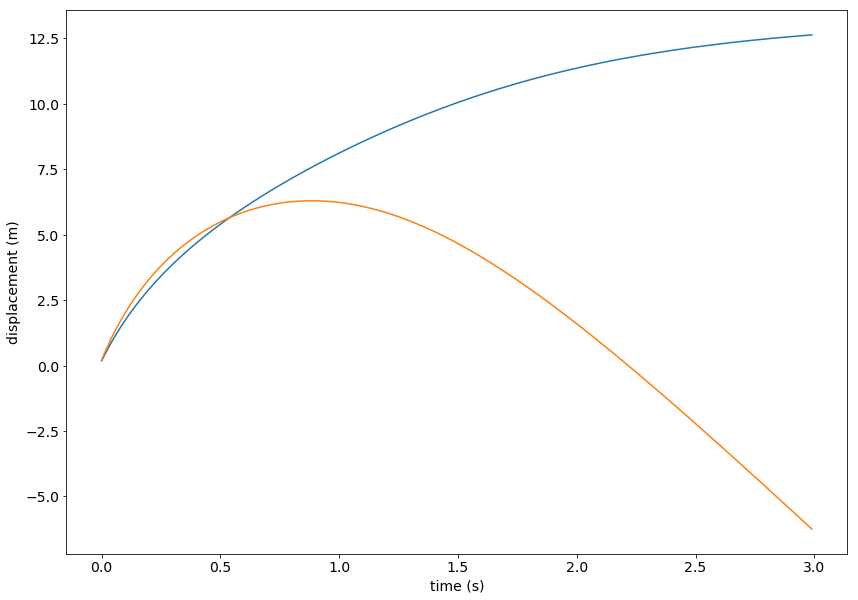

In [ ]:
# plot the solution
plt.plot(timeRange, xs)
plt.plot(timeRange, ys)
plt.ylabel('displacement (m)')
plt.xlabel('time (s)')

In [ ]:
# trajectory
plt.plot(xs,ys)
plt.ylabel('y (m)')
plt.xlabel('x (m)')

We clearly see that the range is approximatley 12 m. Can we be more precise?

In [ ]:
r= np.vstack([xs,ys])

In [ ]:
# maximum height
maxHeight=np.max(ys)
maxHeight

6.2999483126132372

In [ ]:
yIndex=ys.index(maxHeight)
yIndex

88

In [ ]:
np.argmax(ys)

88

In [ ]:
# time at maximum height
timeRange[yIndex]

0.88

In [ ]:
# x position at maximum height
xs[yIndex]

7.5595650150786637

In [ ]:
# create numpy arrays
x=np.array(xs)
y=np.array(ys)

In [ ]:
xIndex=np.min(np.where(y<0))

In [ ]:
timeOfFlight = timeRange[xIndex]
timeOfFlight

2.2200000000000002

In [ ]:
xRange = x[xIndex]
xRange

11.774994708653642

In [ ]:
x[xIndex-1]

11.758427726611741